In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
font_path = "BMJUA_ttf.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
spec = pd.read_csv("user_spec.csv")
result = pd.read_csv("loan_result.csv")

In [3]:
merge = pd.merge(result, spec, right_on="application_id", left_on="application_id")
merge

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN,430982,1996.0,1.0,...,EARNEDINCOME,20220201.0,정규직,자가,25000000.0,대환대출,0.0,0.0,2.0,15000000.0
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN,430982,1996.0,1.0,...,EARNEDINCOME,20220201.0,정규직,자가,25000000.0,대환대출,0.0,0.0,2.0,15000000.0
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN,430982,1996.0,1.0,...,EARNEDINCOME,20220201.0,정규직,자가,25000000.0,대환대출,0.0,0.0,2.0,15000000.0
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN,430982,1996.0,1.0,...,EARNEDINCOME,20220201.0,정규직,자가,25000000.0,대환대출,0.0,0.0,2.0,15000000.0
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN,430982,1996.0,1.0,...,EARNEDINCOME,20220201.0,정규직,자가,25000000.0,대환대출,0.0,0.0,2.0,15000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13527245,1428218,2022-06-03 12:01:58,62,200,3000000.0,14.8,NaN,478802,1965.0,1.0,...,EARNEDINCOME,20190301.0,정규직,기타가족소유,50000000.0,대환대출,0.0,NaN,2.0,56000000.0
13527246,1428218,2022-06-03 12:01:49,2,7,40000000.0,11.8,NaN,478802,1965.0,1.0,...,EARNEDINCOME,20190301.0,정규직,기타가족소유,50000000.0,대환대출,0.0,NaN,2.0,56000000.0
13527247,1428218,2022-06-03 12:01:48,32,257,15000000.0,7.2,NaN,478802,1965.0,1.0,...,EARNEDINCOME,20190301.0,정규직,기타가족소유,50000000.0,대환대출,0.0,NaN,2.0,56000000.0
13527248,1428218,2022-06-03 12:01:48,33,110,44000000.0,13.5,NaN,478802,1965.0,1.0,...,EARNEDINCOME,20190301.0,정규직,기타가족소유,50000000.0,대환대출,0.0,NaN,2.0,56000000.0


In [4]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13527250 entries, 0 to 13527249
Data columns (total 23 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   application_id                       int64  
 1   loanapply_insert_time                object 
 2   bank_id                              int64  
 3   product_id                           int64  
 4   loan_limit                           float64
 5   loan_rate                            float64
 6   is_applied                           float64
 7   user_id                              int64  
 8   birth_year                           float64
 9   gender                               float64
 10  insert_time                          object 
 11  credit_score                         float64
 12  yearly_income                        float64
 13  income_type                          object 
 14  company_enter_month                  float64
 15  employment_type               

In [5]:
merge.isnull().sum()

application_id                                0
loanapply_insert_time                         0
bank_id                                       0
product_id                                    0
loan_limit                                 7382
loan_rate                                  7382
is_applied                              3257239
user_id                                       0
birth_year                               128096
gender                                   128096
insert_time                                   0
credit_score                            1509276
yearly_income                                 6
income_type                                   0
company_enter_month                      400337
employment_type                               0
houseown_type                                 0
desired_amount                                0
purpose                                       0
personal_rehabilitation_yn              5888701
personal_rehabilitation_complete_yn    1

In [6]:
def convert_purpose(data):
    if data == "생활비" or data == "LIVING":
        return 1
    elif data == "대환대출" or data == "SWITCHLOAN":
        return 2
    elif data == "주택구입" or data == "BUYHOUSE":
        return 3
    elif data == "전월세보증금" or data == "HOUSEDEPOSIT":
        return 4
    elif data == "사업자금" or data == "BUSINESS":
        return 5
    elif data == "투자" or data == "INVEST":
        return 6
    elif data == "자동차구입" or data == "BUYCAR":
        return 7
    elif data == "기타" or data == "ETC":
        return 0

In [7]:
merge['purpose'].value_counts()

생활비             6828706
대환대출            4073362
주택구입             569679
전월세보증금           569284
사업자금             551570
기타               400084
투자               285670
LIVING           107532
자동차구입             58571
SWITCHLOAN        33615
HOUSEDEPOSIT      15912
BUYHOUSE          10989
BUSINESS           8513
ETC                7374
INVEST             3634
BUYCAR             2755
Name: purpose, dtype: int64

In [8]:
merge['purpose'] = merge['purpose'].apply(convert_purpose)
pd.get_dummies(data = merge, columns = ['purpose'], prefix = 'purpose')

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,existing_loan_cnt,existing_loan_amt,purpose_0,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN,430982,1996.0,1.0,...,2.0,15000000.0,0,0,1,0,0,0,0,0
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN,430982,1996.0,1.0,...,2.0,15000000.0,0,0,1,0,0,0,0,0
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN,430982,1996.0,1.0,...,2.0,15000000.0,0,0,1,0,0,0,0,0
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN,430982,1996.0,1.0,...,2.0,15000000.0,0,0,1,0,0,0,0,0
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN,430982,1996.0,1.0,...,2.0,15000000.0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13527245,1428218,2022-06-03 12:01:58,62,200,3000000.0,14.8,NaN,478802,1965.0,1.0,...,2.0,56000000.0,0,0,1,0,0,0,0,0
13527246,1428218,2022-06-03 12:01:49,2,7,40000000.0,11.8,NaN,478802,1965.0,1.0,...,2.0,56000000.0,0,0,1,0,0,0,0,0
13527247,1428218,2022-06-03 12:01:48,32,257,15000000.0,7.2,NaN,478802,1965.0,1.0,...,2.0,56000000.0,0,0,1,0,0,0,0,0
13527248,1428218,2022-06-03 12:01:48,33,110,44000000.0,13.5,NaN,478802,1965.0,1.0,...,2.0,56000000.0,0,0,1,0,0,0,0,0


In [9]:
def convert_house(data):
    if data == "전월세":
        return 1
    elif data == "자가":
        return 2
    elif data == "배우자":
        return 3
    elif data == "기타가족소유":
        return 0

In [10]:
merge['houseown_type'].value_counts()

전월세       6024282
자가        3817266
기타가족소유    3672900
배우자         12802
Name: houseown_type, dtype: int64

In [11]:
merge['houseown_type'] = merge['houseown_type'].apply(convert_house)
pd.get_dummies(data = merge, columns = ['houseown_type'], prefix = 'houseown_type')

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,houseown_type_0,houseown_type_1,houseown_type_2,houseown_type_3
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN,430982,1996.0,1.0,...,25000000.0,2,0.0,0.0,2.0,15000000.0,0,0,1,0
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN,430982,1996.0,1.0,...,25000000.0,2,0.0,0.0,2.0,15000000.0,0,0,1,0
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN,430982,1996.0,1.0,...,25000000.0,2,0.0,0.0,2.0,15000000.0,0,0,1,0
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN,430982,1996.0,1.0,...,25000000.0,2,0.0,0.0,2.0,15000000.0,0,0,1,0
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN,430982,1996.0,1.0,...,25000000.0,2,0.0,0.0,2.0,15000000.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13527245,1428218,2022-06-03 12:01:58,62,200,3000000.0,14.8,NaN,478802,1965.0,1.0,...,50000000.0,2,0.0,NaN,2.0,56000000.0,1,0,0,0
13527246,1428218,2022-06-03 12:01:49,2,7,40000000.0,11.8,NaN,478802,1965.0,1.0,...,50000000.0,2,0.0,NaN,2.0,56000000.0,1,0,0,0
13527247,1428218,2022-06-03 12:01:48,32,257,15000000.0,7.2,NaN,478802,1965.0,1.0,...,50000000.0,2,0.0,NaN,2.0,56000000.0,1,0,0,0
13527248,1428218,2022-06-03 12:01:48,33,110,44000000.0,13.5,NaN,478802,1965.0,1.0,...,50000000.0,2,0.0,NaN,2.0,56000000.0,1,0,0,0


In [ ]:
def convert_income(data):
    if data == "EARNEDINCOME":
        return 1
    elif data == "EARNEDINCOME2":
        return 2
    elif data == "PRIVATEBUSINESS":
        return 3
    elif data == "FREELANCER":
        return 4
    elif data == "PRACTITIONER":
        return 5
    elif data == "OTHERINCOME":
        return 0

In [18]:
merge['income_type'].value_counts()

EARNEDINCOME       11467245
EARNEDINCOME2        564602
PRIVATEBUSINESS      494237
OTHERINCOME          402850
FREELANCER           312935
PRACTITIONER         285381
Name: income_type, dtype: int64

In [21]:
#merge['houseown_type'] = merge['houseown_type'].apply(convert_house)
pd.get_dummies(data = merge, columns = ['income_type'], prefix = 'income_type')

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,income_type_EARNEDINCOME,income_type_EARNEDINCOME2,income_type_FREELANCER,income_type_OTHERINCOME,income_type_PRACTITIONER,income_type_PRIVATEBUSINESS
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN,430982,1996.0,1.0,...,0.0,0.0,2.0,15000000.0,1,0,0,0,0,0
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN,430982,1996.0,1.0,...,0.0,0.0,2.0,15000000.0,1,0,0,0,0,0
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN,430982,1996.0,1.0,...,0.0,0.0,2.0,15000000.0,1,0,0,0,0,0
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN,430982,1996.0,1.0,...,0.0,0.0,2.0,15000000.0,1,0,0,0,0,0
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN,430982,1996.0,1.0,...,0.0,0.0,2.0,15000000.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13527245,1428218,2022-06-03 12:01:58,62,200,3000000.0,14.8,NaN,478802,1965.0,1.0,...,0.0,NaN,2.0,56000000.0,1,0,0,0,0,0
13527246,1428218,2022-06-03 12:01:49,2,7,40000000.0,11.8,NaN,478802,1965.0,1.0,...,0.0,NaN,2.0,56000000.0,1,0,0,0,0,0
13527247,1428218,2022-06-03 12:01:48,32,257,15000000.0,7.2,NaN,478802,1965.0,1.0,...,0.0,NaN,2.0,56000000.0,1,0,0,0,0,0
13527248,1428218,2022-06-03 12:01:48,33,110,44000000.0,13.5,NaN,478802,1965.0,1.0,...,0.0,NaN,2.0,56000000.0,1,0,0,0,0,0


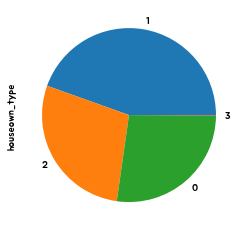

In [13]:
merge['houseown_type'].value_counts().plot(kind='pie')
plt.show()

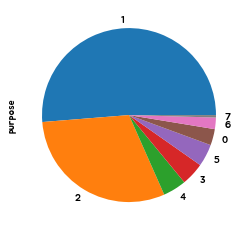

In [14]:
merge['purpose'].value_counts().plot(kind='pie')
plt.show()

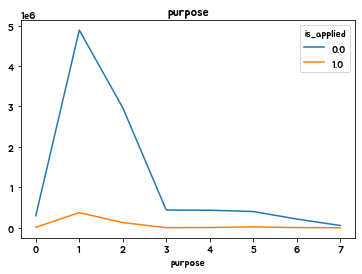

In [15]:
grape_df = merge.groupby(['purpose','is_applied'])['is_applied'].count().unstack('is_applied')
grape_df.plot()
plt.title('purpose')
plt.show()

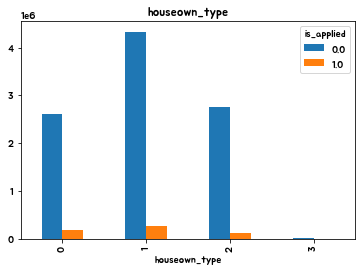

In [16]:
grape_df = merge.groupby(['houseown_type','is_applied'])['is_applied'].count().unstack('is_applied')
grape_df.plot(kind='bar')
plt.title('houseown_type')
plt.show()

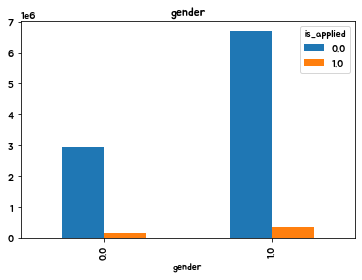

In [17]:
grape_df = merge.groupby(['gender','is_applied'])['is_applied'].count().unstack('is_applied')
grape_df.plot(kind='bar')
plt.title('gender')
plt.show()